# [Claim Fraud Prediction](https://pathfinder.datarobot.com/notebook/fraudulent-claim-detection?tab=overview)

OneNote2021 > DataRobot > Pathfinder 用例推廣 

Zepl Notebook 

    https://app.zepl.com/viewer/notebooks/bm90ZTovL3pzaGFpbnNreStjZmRzQHplcGwuY29tLzQ4MzgxYzBlZjc2YzQxMWI4MDlmNWZhZTc0NzU2ODAzL25vdGUuanNvbg



In [ ]:
# LBB2 has not installed DataRobot so I carefully make this jupyternotebook to use the correct kernel (my Orange3 venv) and try pip install.
# Anticipating the installation can be done within this VS Code JupyterNotebook.
!pip install datarobot

# The above has two problems: 
#   catboost 0.26.1 requires graphviz, which is not installed.
#   catboost 0.26.1 requires plotly, which is not installed.
# Don't care for now, let's go on. Yes we can because import datarobot is ok. 

In [55]:
%run c:\Users\8304018\Documents\GitHub\examples-for-data-scientists\Playground\jupyter-extension-4-DataRobot.py

c:\Users\8304018\Documents\GitHub\examples-for-data-scientists\Playground\jupyter-extension-4-DataRobot.py
p e f o r t h    v1.28
source code http://github.com/hcchengithub/peforth
Type 'peforth.ok()' to enter forth interpreter, 'exit' to come back.



<Figure size 432x288 with 0 Axes>

In [3]:
%matplotlib inline
from IPython.core.display import HTML
import datarobot as dr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

light_blue = "#598fd6"
grey_blue = "#5f728b"
orange = "#dd6b3d"

# Read in data

In [4]:
# data_path = "https://s3.amazonaws.com/datarobot-use-case-datasets/maintenance_training.csv"
data_path = "https://s3.amazonaws.com/datarobot-use-case-datasets/DR_Demo_Car_Insurance_Fraud_train.csv"
pathfinder_df = pd.read_csv(data_path, encoding = "ISO-8859-1")
display(pathfinder_df.head(100)) # Zepl's z.show() === display() 

,ID,FRAUD,DATE,POLICY_LENGTH,LOCALITY,REGION,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,...,LOCAL_NON_CLM_PERS_MATCH,federal_TEL_MATCH,federal_CLM_ADD_MATCH,federal_CLM_PERS_MATCH,federal_NON_CLM_ADD_MATCH,federal_NON_CLM_PERS_MATCH,SCR_LOCAL_RULE_COUNT,SCR_NAT_RULE_COUNT,RULE_MATCHES,CLAIM_DESCRIPTION
0,1,0,NaN,12 month,OX29,OX,1,0,0,0,...,0,0,0,0,0,0,0,0,0,this via others themselves inc become within o...
1,3,1,31/01/2013,12 month,LN2,LN,1,1,0,0,...,0,0,0,0,0,0,0,0,1,indeed none you to somehow call whereas anyhow...
2,4,1,NaN,12 month,SL6,SL,1,1,0,0,...,0,0,0,0,0,0,2,0,1,am not fire same now over whence therein right...
3,6,0,31/01/2014,12 month,LA4,LA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nor put see not seems serious is herself motor...
4,9,0,31/07/2013,12 month,CM8,CM,1,0,0,0,...,0,0,0,0,0,0,0,0,0,more being third us part but found neither not...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,130,1,31/01/2013,9 month,SO18,SO,0,1,0,0,...,0,0,0,0,0,0,0,0,1,afterwards four although you sometimes around ...
96,131,1,NaN,6 month,PO13,PO,0,0,0,0,...,0,0,0,0,0,0,2,0,1,might towards all will into somewhere wherever...
97,132,1,NaN,6 month,KA20,KA,1,0,0,0,...,0,0,0,0,0,0,2,0,1,the above might no until about behind thereupo...
98,134,1,NaN,12 month,LE14,LE,1,0,0,0,...,0,0,0,0,0,0,0,0,0,for are but whose three whereas than they roun...


# Fraud Claims by Policy Length

In [5]:

df1 = pathfinder_df.where(pathfinder_df['FRAUD'] == 1).groupby('POLICY_LENGTH').agg({'FRAUD': 'count'})
df2 = pathfinder_df.where(pathfinder_df['FRAUD'] == 0).groupby('POLICY_LENGTH').agg({'FRAUD': 'count'})

df_perc = (df1/(df2+df1))
df_perc = df_perc.reset_index()

df_perc

,POLICY_LENGTH,FRAUD
0,12 month,0.162943
1,6 month,0.161542
2,9 month,0.167161


<BarContainer object of 3 artists>

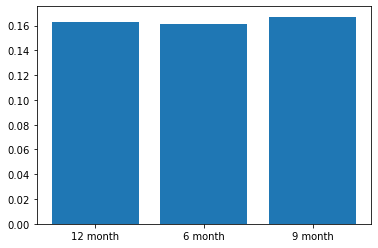

In [6]:
plt.bar(df_perc['POLICY_LENGTH'],df_perc['FRAUD'])

# Average Weight of Package

In [7]:
df2 = pathfinder_df.groupby('FRAUD').agg({'NUM_PI_CLAIM': 'mean', 'DISTINCT_PARTIES_ON_CLAIM': 'mean'}).reset_index()
df2['FRAUD'] = df2['FRAUD'].apply(lambda is_fraud: 'FRAUD' if is_fraud == 1.0 else 'NOT FRAUD')
df2

,FRAUD,NUM_PI_CLAIM,DISTINCT_PARTIES_ON_CLAIM
0,NOT FRAUD,0.212411,2.141052
1,FRAUD,1.854300,5.134328


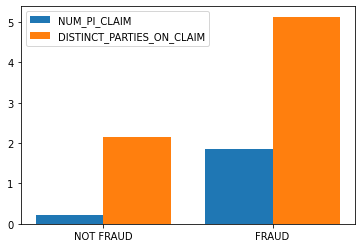

In [36]:
plt.bar(df2['FRAUD'],df2['NUM_PI_CLAIM'], width=0.8, label='NUM_PI_CLAIM', align='center')
plt.bar(df2['FRAUD'],df2['DISTINCT_PARTIES_ON_CLAIM'], width=0.4, label='DISTINCT_PARTIES_ON_CLAIM',align='edge')
plt.legend(loc="upper left") 

# Fraud by Region

In [37]:
df1 = pathfinder_df.where(pathfinder_df['FRAUD'] == 1).groupby('REGION').agg({'FRAUD': 'count'})
df2 = pathfinder_df.where(pathfinder_df['FRAUD'] == 0).groupby('REGION').agg({'FRAUD': 'count'})

df_perc = (df1/(df2+df1))
df_perc = df_perc.reset_index()

df_perc

,REGION,FRAUD
0,AB,0.179487
1,AL,0.161290
2,B,0.194332
3,BA,0.052632
4,BB,0.168831
...,...,...
122,WR,0.058824
123,WS,0.093333
124,WV,0.105263
125,YO,0.137931


<BarContainer object of 127 artists>

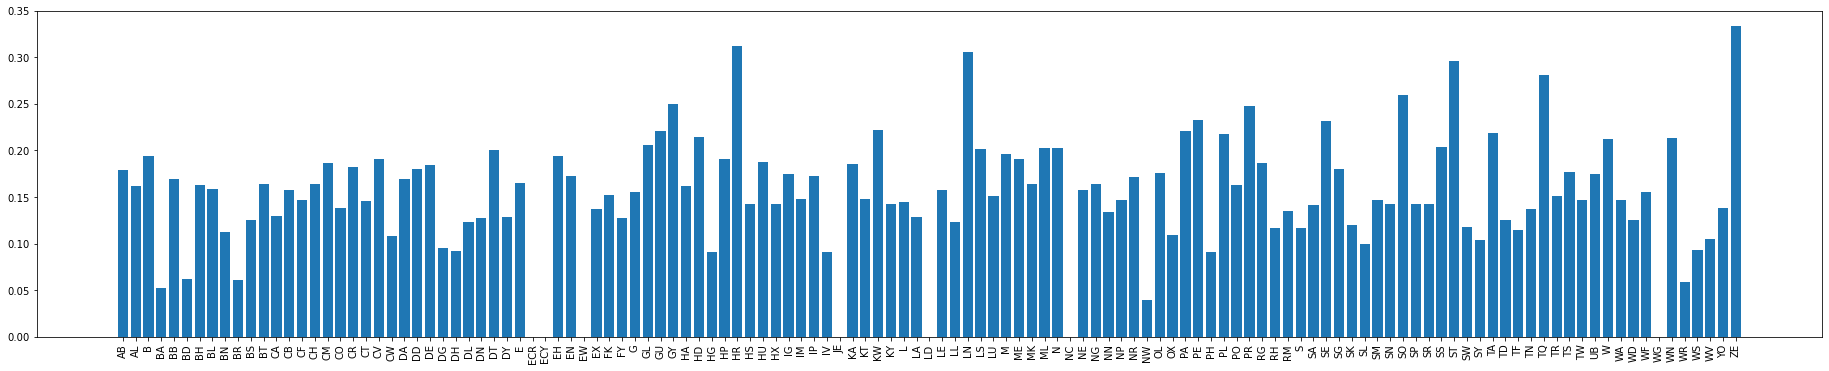

In [53]:
plt.figure(figsize=(32,6)) # 寬一點
plt.xticks(rotation='vertical') # X 軸 label 豎起來
plt.bar(df_perc['REGION'],df_perc['FRAUD']) # 畫 bar chart 


# DataRobot Modeling

## Connect to DataRobot

In [56]:
dr.Client(token=peforth.execute('api_token').pop(), endpoint=peforth.execute('endpoint').pop())
# wall time 0.9s

## Create and Start DataRobot Project 
*login to DataRobot to see your project starting...this may take a few minutes

In [ ]:
# Uncomment and replace Project ID if project already exists in DataRobot
project = dr.Project.get("61a04486e37fc518f02a30e3") # 真咱建的 project ID！

In [57]:
# Create project and pass in data
project = dr.Project.create(sourcedata = pathfinder_df,
                            project_name = 'Claim Fraud Prediction')

In [58]:
# Set Project target to the appropriate feature (column name). We will use the LogLoss metric to measure performance and manually specify Autopilot to run on a subset of models
project.set_target(target='FRAUD',
                  mode=dr.AUTOPILOT_MODE.QUICK, 
                  worker_count='-1')

Project(Claim Fraud Prediction)

In [ ]:

# Get the project metric (i.e LogLoss, RMSE, etc...)
metric = project.metric

# Get Project URL
project_url = project.get_leaderboard_ui_permalink()

# Display Project ID and Name
display(HTML('''<h3> Project Details</h3> 
                    <ul>
                        <li>Project URL: <a href="{project_url}" target="_blank">{project_url}</a></li>
                        <li>Project ID: {project_id}</li>
                        <li>Project Name: {project_name}</li> 
                    </ul>
    '''.format(project_url = project_url, project_id = project.id, project_name = project.project_name)))

## Pause notebook execution until training is complet

In [59]:
project.wait_for_autopilot(check_interval=30)

In progress: 10, queued: 0 (waited: 0s)
In progress: 10, queued: 0 (waited: 1s)
In progress: 10, queued: 0 (waited: 2s)
In progress: 10, queued: 0 (waited: 4s)
In progress: 10, queued: 0 (waited: 5s)
In progress: 10, queued: 0 (waited: 8s)
In progress: 10, queued: 0 (waited: 12s)
In progress: 10, queued: 0 (waited: 19s)
In progress: 7, queued: 0 (waited: 33s)
In progress: 1, queued: 0 (waited: 60s)
In progress: 1, queued: 0 (waited: 91s)
In progress: 5, queued: 0 (waited: 122s)
In progress: 4, queued: 0 (waited: 153s)
In progress: 16, queued: 0 (waited: 184s)
In progress: 16, queued: 0 (waited: 215s)
In progress: 2, queued: 0 (waited: 246s)
In progress: 0, queued: 0 (waited: 277s)
In progress: 0, queued: 0 (waited: 308s)
In progress: 0, queued: 0 (waited: 339s)
In progress: 0, queued: 0 (waited: 369s)
In progress: 5, queued: 0 (waited: 400s)
In progress: 1, queued: 0 (waited: 431s)
In progress: 1, queued: 1 (waited: 462s)
In progress: 1, queued: 0 (waited: 493s)
In progress: 1, queued:

# Helper Function: Sort model that performed with the best score by metric

In [60]:
# Helper Function: Sort model that performed with the best score by metric

def sorted_by_metric(models, test_set, metric):
    models_with_score = [model for model in models if
                         model.metrics[metric][test_set] is not None]
    
    return sorted(models_with_score,
                  key=lambda model: model.metrics[metric][test_set])

# 應該用不著這個 function, project.get_models() 出來已經排好序了。 注意： [0] 不是最上面的那個 recommended 而是 performance 最好的. 

# Get Top Performing Model

In [61]:
# Get Top Performing Model

models = project.get_models()

In [63]:
# Uncomment if this is not set above in the create project paragraph
metric = project.metric

In [64]:
# Get top performing model
model_top = sorted_by_metric(models, 'crossValidation', metric)[0]
print('''The top performing model is {model} using metric, {metric}'''.format(model = str(model_top), metric = metric))

The top performing model is Model('eXtreme Gradient Boosted Trees Classifier with Early Stopping') using metric, LogLoss


In [68]:
%f model_top :> model_number -->
%f model_top :> id -->
%f model_top :> blueprint_id -->

model_top :> model_number --> 16 (<class 'int'>)
model_top :> id --> 61a045c98bd41a398250c559 (<class 'str'>)
model_top :> blueprint_id --> eb38309e36385d3ba19484caf8afa777 (<class 'str'>)


In [67]:
%f models :> [0].model_number -->
%f models :> [0].id -->
%f models :> [0].blueprint_id -->

models :> [0].model_number --> 16 (<class 'int'>)
models :> [0].id --> 61a045c98bd41a398250c559 (<class 'str'>)
models :> [0].blueprint_id --> eb38309e36385d3ba19484caf8afa777 (<class 'str'>)


# Create Prediction Server and Deploy top performing Model

# Read and display scoring data

In [76]:
data_path_scoring = "https://s3.amazonaws.com/datarobot-use-case-datasets/DR_Demo_Car_Insurance_Fraud_pred.csv"

scoring_df = pd.read_csv(data_path_scoring, encoding = "ISO-8859-1")
scoring_df["DISTINCT_PARTIES_ON_CLAIM_dc"] = scoring_df["DISTINCT_PARTIES_ON_CLAIM"].nunique()
scoring_df["NUM_PI_CLAIM_dc"] = scoring_df["NUM_PI_CLAIM"].nunique()
scoring_df

,ID,FRAUD,DATE,POLICY_LENGTH,LOCALITY,REGION,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,...,federal_CLM_ADD_MATCH,federal_CLM_PERS_MATCH,federal_NON_CLM_ADD_MATCH,federal_NON_CLM_PERS_MATCH,SCR_LOCAL_RULE_COUNT,SCR_NAT_RULE_COUNT,RULE_MATCHES,CLAIM_DESCRIPTION,DISTINCT_PARTIES_ON_CLAIM_dc,NUM_PI_CLAIM_dc
0,6515,0,31/12/2013,12 month,EH5,EH,1,0,0,0,...,0,0,0,0,0,0,0,etc mostly out indeed yet ourselves together a...,16,8
1,2254,0,NaN,6 month,NG10,NG,0,0,0,0,...,0,0,0,0,0,0,0,throughout with upon else noone seeming yourse...,16,8
2,7452,0,31/10/2013,6 month,S12,S,0,0,0,0,...,0,0,0,0,0,0,0,after may therefore which part wherever an and...,16,8
3,7949,0,31/07/2014,9 month,TW18,TW,0,0,0,0,...,0,0,0,0,0,0,0,moreover either mine how could before amongst ...,16,8
4,6399,1,31/12/2013,12 month,HU5,HU,1,1,0,0,...,0,0,0,1,5,2,1,interest another nobody who my upon de to sudd...,16,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6881,1,NaN,12 month,GL2,GL,0,0,0,0,...,0,0,1,0,1,1,0,she please along still we ours those if vehicl...,16,8
496,3437,0,31/08/2014,6 month,DE73,DE,1,0,1,0,...,0,0,0,0,0,0,0,whoever by sixty inc eleven many should often ...,16,8
497,9340,0,NaN,6 month,CF41,CF,0,0,0,0,...,0,0,0,0,0,0,0,hasnt put get becoming amount have mill few sl...,16,8
498,2191,0,31/01/2013,6 month,LL19,LL,1,0,0,0,...,0,0,0,0,1,0,1,serious often sometime nothing into empty alre...,16,8


# Upload scoring data set to DataRobot


In [77]:
prediction_dataset = project.upload_dataset(scoring_df)
predict_job = model_top.request_predictions(prediction_dataset.id)
prediction_dataset.id

'61a052086b714a69b92b0ad7'

# Make predictions

In [78]:
predictions = predict_job.get_result_when_complete()

C:\Users\8304018\AppData\Roaming\Python\Python38\site-packages\datarobot\utils\__init__.py:339: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  return frame.drop("prediction_values", 1)


In [79]:
predictions

,row_id,prediction,positive_probability,prediction_threshold,class_0.0,class_1.0
0,0,0.0,0.021476,0.5,0.978524,0.021476
1,1,0.0,0.020622,0.5,0.979378,0.020622
2,2,0.0,0.096808,0.5,0.903192,0.096808
3,3,0.0,0.014935,0.5,0.985065,0.014935
4,4,1.0,0.983046,0.5,0.016954,0.983046
...,...,...,...,...,...,...
495,495,1.0,0.783517,0.5,0.216483,0.783517
496,496,0.0,0.037133,0.5,0.962867,0.037133
497,497,0.0,0.011951,0.5,0.988049,0.011951
498,498,1.0,0.863104,0.5,0.136896,0.863104


In [83]:
scoring_df.head(2)

,ID,FRAUD,DATE,POLICY_LENGTH,LOCALITY,REGION,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,...,federal_CLM_ADD_MATCH,federal_CLM_PERS_MATCH,federal_NON_CLM_ADD_MATCH,federal_NON_CLM_PERS_MATCH,SCR_LOCAL_RULE_COUNT,SCR_NAT_RULE_COUNT,RULE_MATCHES,CLAIM_DESCRIPTION,DISTINCT_PARTIES_ON_CLAIM_dc,NUM_PI_CLAIM_dc
0,6515,0,31/12/2013,12 month,EH5,EH,1,0,0,0,...,0,0,0,0,0,0,0,etc mostly out indeed yet ourselves together a...,16,8
1,2254,0,NaN,6 month,NG10,NG,0,0,0,0,...,0,0,0,0,0,0,0,throughout with upon else noone seeming yourse...,16,8


In [85]:
result_df = pd.concat([scoring_df, predictions], axis=1)

In [86]:
result_df

,ID,FRAUD,DATE,POLICY_LENGTH,LOCALITY,REGION,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,...,RULE_MATCHES,CLAIM_DESCRIPTION,DISTINCT_PARTIES_ON_CLAIM_dc,NUM_PI_CLAIM_dc,row_id,prediction,positive_probability,prediction_threshold,class_0.0,class_1.0
0,6515,0,31/12/2013,12 month,EH5,EH,1,0,0,0,...,0,etc mostly out indeed yet ourselves together a...,16,8,0,0.0,0.021476,0.5,0.978524,0.021476
1,2254,0,NaN,6 month,NG10,NG,0,0,0,0,...,0,throughout with upon else noone seeming yourse...,16,8,1,0.0,0.020622,0.5,0.979378,0.020622
2,7452,0,31/10/2013,6 month,S12,S,0,0,0,0,...,0,after may therefore which part wherever an and...,16,8,2,0.0,0.096808,0.5,0.903192,0.096808
3,7949,0,31/07/2014,9 month,TW18,TW,0,0,0,0,...,0,moreover either mine how could before amongst ...,16,8,3,0.0,0.014935,0.5,0.985065,0.014935
4,6399,1,31/12/2013,12 month,HU5,HU,1,1,0,0,...,1,interest another nobody who my upon de to sudd...,16,8,4,1.0,0.983046,0.5,0.016954,0.983046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6881,1,NaN,12 month,GL2,GL,0,0,0,0,...,0,she please along still we ours those if vehicl...,16,8,495,1.0,0.783517,0.5,0.216483,0.783517
496,3437,0,31/08/2014,6 month,DE73,DE,1,0,1,0,...,0,whoever by sixty inc eleven many should often ...,16,8,496,0.0,0.037133,0.5,0.962867,0.037133
497,9340,0,NaN,6 month,CF41,CF,0,0,0,0,...,0,hasnt put get becoming amount have mill few sl...,16,8,497,0.0,0.011951,0.5,0.988049,0.011951
498,2191,0,31/01/2013,6 month,LL19,LL,1,0,0,0,...,1,serious often sometime nothing into empty alre...,16,8,498,1.0,0.863104,0.5,0.136896,0.863104


In [87]:
# 目視有些差別
result_df[['FRAUD','prediction']]


,FRAUD,prediction
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0
...,...,...
495,1,1.0
496,0,0.0
497,0,0.0
498,0,1.0
